In [1]:
import pandas as pd
from dfply import *

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#lake_data = pd.read_csv("./data/union_of_parcel_data.csv")
lake_stats = pd.read_csv("./data/lakes_stats.csv")

In [4]:
lake_stats.columns = ['Unnamed: 0', 'lake_code', 'Year', 'lake_name', 'mean_secchi',
       'med_secchi', 'sd_secchi', 'mean_phos', 'med_phos', 'sd_phos']

#lake_stats.head()

#lake_data.columns

lake_all = lake_data >> left_join(lake_stats, by=['Year', 'lake_code', 'lake_name'])

#lake_all.shape

#lake_all.head()

lake_all.to_csv("./data/parcel_with_lake_data.csv")

In [5]:
#lake_all = pd.read_csv("./data/parcel_with_lake_data.csv")

In [6]:
#lake_all.columns

In [7]:
secchi_by_lake = (lake_stats
                  >> group_by(X.lake_name)
                  >> summarize(overall_mean_secchi = X.mean_secchi.mean())
                 ) 

In [8]:
low_secchi = [name for name in secchi_by_lake.sort_values('overall_mean_secchi')[0:5].lake_name]

high_secchi = [name for name in secchi_by_lake.sort_values('overall_mean_secchi')[-5:].lake_name]

In [9]:
high_secchi

['Lower Prior Lake',
 'Sunset Lake',
 'East Boot Lake',
 'Lac Lavon Lake',
 'Jane Lake']

In [10]:
low_secchi

['Cobblecrest Lake',
 'Markgraf Lake',
 'Swede Lake',
 'George Watch Lake',
 'Farquar Lake']

In [11]:
lake_names = set(lake_stats.lake_name)

Text(0,0.5,'Mean Secchi Depth')

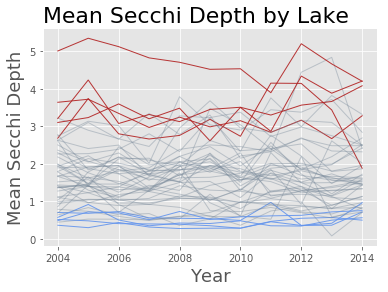

In [12]:
plt.style.use('ggplot')

palette = plt.get_cmap('Set1')

for name in lake_names:
    df = (lake_stats >> filter_by(X.lake_name == name))
    if name in high_secchi:
        plt.plot(df.Year, df.mean_secchi, marker='', color='firebrick', linewidth=1, alpha=0.9, label="High Mean Secchi Depth")
    elif name in low_secchi:
        plt.plot(df.Year, df.mean_secchi, marker='', color='cornflowerblue', linewidth=1, alpha=0.9, label="Low Mean Secchi Depth")
    else:
        plt.plot(df.Year, df.mean_secchi, marker='', color='lightslategrey', linewidth=1, alpha=0.4, label="Mean Secchi Depth")
               

    
plt.title("Mean Secchi Depth by Lake", loc='left', fontsize=22, fontweight=0, color='black')
plt.xlabel("Year", fontsize=18)
plt.ylabel("Mean Secchi Depth", fontsize=18)
#plt.savefig("./Sech_time_plot.png")

In [13]:
plt.style.available

['Solarize_Light2',
 '_classic_test',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'tableau-colorblind10']

In [14]:
phos_by_lake = (lake_stats
                  >> group_by(X.lake_name)
                  >> summarize(overall_mean_phos = X.mean_phos.mean())
                 ) 

In [15]:
low_phos = [name for name in phos_by_lake.sort_values('overall_mean_phos')[0:5].lake_name]

high_phos = [name for name in phos_by_lake.sort_values('overall_mean_phos')[-5:].lake_name]

In [17]:
low_phos

['Jane Lake', 'Sunset Lake', 'Lac Lavon Lake', 'St. Joe Lake', 'Olson Lake']

In [18]:
high_phos

['Colby Lake',
 'Northwood Lake',
 'Eagle Lake',
 'George Watch Lake',
 'Swede Lake']

Text(0,0.5,'Mean Phosphorus')

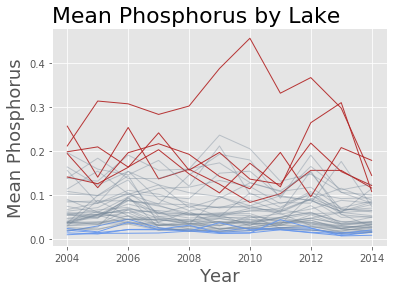

In [19]:
plt.style.use('ggplot')
#palette = plt.get_cmap('Set1')

for name in lake_names:
    df = (lake_stats >> filter_by(X.lake_name == name))
    if name in high_phos:
        plt.plot(df.Year, df.mean_phos, marker='', color='firebrick', linewidth=1, alpha=0.9, label="High Mean phosphorus")
    elif name in low_phos:
        plt.plot(df.Year, df.mean_phos, marker='', color='cornflowerblue', linewidth=1, alpha=0.9, label="Low Mean phosphorus")
    else:
        plt.plot(df.Year, df.mean_phos, marker='', color='lightslategrey', linewidth=1, alpha=0.4, label="Mean phosphorus")
               

    
plt.title("Mean Phosphorus by Lake", loc='left', fontsize=22, fontweight=0, color='black')
plt.xlabel("Year", fontsize=18)
plt.ylabel("Mean Phosphorus", fontsize=18)
#plt.savefig("./Phos_time_plot.png")


In [20]:
lake_stats.Year = lake_stats.Year.astype(str)
lakes_first_last_year = (lake_stats
                         >> filter_by((X.Year.isin(['2004','2014'])))
                        )
secchi_diff = (lake_stats
                         >> filter_by((X.Year.isin(['2004','2014'])))
                         >> spread(X.Year, X.mean_secchi)
                         #>> rename(secchi_2004 = 2004)#, secchi_2014 = 2014)
                         >> group_by(X.lake_name)
                         >> summarize(secchi_2004 = X['2004'].sum(), secchi_2014 = X['2014'].sum())
                         >> mutate(diff = X.secchi_2014 - X.secchi_2004)
                        )
phos_diff = (lake_stats
                         >> filter_by((X.Year.isin(['2004','2014'])))
                         >> spread(X.Year, X.mean_phos)
                         #>> rename(secchi_2004 = 2004)#, secchi_2014 = 2014)
                         >> group_by(X.lake_name)
                         >> summarize(phos_2004 = X['2004'].sum(), phos_2014 = X['2014'].sum())
                         >> mutate(diff = X.phos_2014 - X.phos_2004)
                        )

In [21]:
lakes_first_last_year.head()

,Unnamed: 0,lake_code,Year,lake_name,mean_secchi,med_secchi,sd_secchi,mean_phos,med_phos,sd_phos
0,0,19002100-01,2004,Alimagnet Lake,0.445000,0.500,0.204736,0.164500,0.1070,0.137039
10,10,19002100-01,2014,Alimagnet Lake,0.966667,1.150,0.445856,0.082500,0.0560,0.046308
11,11,82011602-01,2004,Armstrong Lake,0.990357,0.914,0.115908,0.059286,0.0575,0.019535
21,21,82011602-01,2014,Armstrong Lake,0.704000,0.610,0.424123,0.065600,0.0760,0.039234
22,22,82012300-01,2004,Bass Lake,2.612571,2.591,0.572962,0.030429,0.0300,0.005192


In [22]:
secchi_diff.head()

,lake_name,secchi_2004,secchi_2014,diff
0,Alimagnet Lake,0.445000,0.966667,0.521667
1,Armstrong Lake,0.990357,0.704000,-0.286357
2,Bass Lake,2.612571,2.320000,-0.292571
3,Bavaria Lake,1.986250,1.723077,-0.263173
4,Big Comfort Lake,1.894000,1.456364,-0.437636


In [23]:
phos_diff.head()

,lake_name,phos_2004,phos_2014,diff
0,Alimagnet Lake,0.164500,0.082500,-0.082000
1,Armstrong Lake,0.059286,0.065600,0.006314
2,Bass Lake,0.030429,0.027611,-0.002817
3,Bavaria Lake,0.037313,0.037385,0.000072
4,Big Comfort Lake,0.038643,0.034591,-0.004052


In [24]:
low_diff_secchi = [name for name in secchi_diff.sort_values('diff')[0:5].lake_name]

high_diff_secchi = [name for name in secchi_diff.sort_values('diff')[-5:].lake_name]

In [25]:
low_diff_secchi

['McKusick Lake',
 'Kismet Lake',
 'Jane Lake',
 'Lower Prior Lake',
 'Keller Lake']

In [26]:
high_diff_secchi

['Lac Lavon Lake',
 'East Boot Lake',
 'Lee Lake',
 'Twin Lake',
 'Regional Park Lake']

In [27]:
low_diff_phos = [name for name in phos_diff.sort_values('diff')[0:5].lake_name]

high_diff_phos = [name for name in phos_diff.sort_values('diff')[-5:].lake_name]

In [28]:
low_diff_phos

['Colby Lake',
 'Twin Lake',
 'George Watch Lake',
 'Alimagnet Lake',
 'Farquar Lake']

In [29]:
high_diff_phos

['Armstrong Lake', 'McKusick Lake', 'Valley Lake', 'Fish Lake', 'Keller Lake']

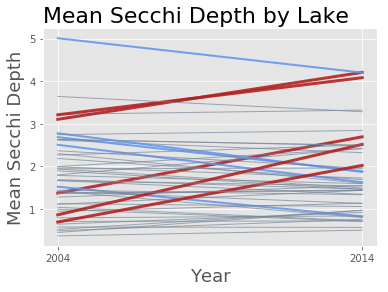

In [44]:
plt.style.use('ggplot')

palette = plt.get_cmap('Set1')

for name in lake_names:
    df = (lakes_first_last_year >> filter_by(X.lake_name == name))
    if name in high_diff_secchi:
        plt.plot(df.Year, df.mean_secchi, marker='', color='firebrick', linewidth=3, alpha=0.9, label="High Mean Secchi Depth Difference")
    elif name in low_diff_secchi:
        plt.plot(df.Year, df.mean_secchi, marker='', color='cornflowerblue', linewidth=2, alpha=0.9, label="Low Mean Secchi Depth Difference")
    else:
        plt.plot(df.Year, df.mean_secchi, marker='', color='lightslategrey', linewidth=1, alpha=0.7, label="Mean Secchi Depth Difference")
               

    
plt.title("Mean Secchi Depth by Lake", loc='left', fontsize=22, fontweight=0, color='black')
plt.xlabel("Year", fontsize=18)
plt.ylabel("Mean Secchi Depth", fontsize=18)
#plt.savefig("./Sech_diff_plot.png")

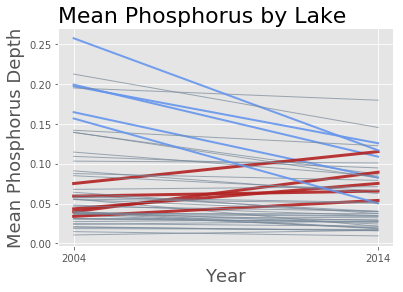

In [43]:
plt.style.use('ggplot')

palette = plt.get_cmap('Set1')

for name in lake_names:
    df = (lakes_first_last_year >> filter_by(X.lake_name == name))
    if name in high_diff_phos:
        plt.plot(df.Year, df.mean_phos, marker='', color='firebrick', linewidth=3, alpha=0.9, label="High Mean Phosphorus Depth Difference")
    elif name in low_diff_phos:
        plt.plot(df.Year, df.mean_phos, marker='', color='cornflowerblue', linewidth=2, alpha=0.9, label="Low Mean Phosphorus Depth Difference")
    else:
        plt.plot(df.Year, df.mean_phos, marker='', color='lightslategrey', linewidth=1, alpha=0.7, label="Mean Phosphorus Depth Difference")
               

    
plt.title("Mean Phosphorus by Lake", loc='left', fontsize=22, fontweight=0, color='black')
plt.xlabel("Year", fontsize=18)
plt.ylabel("Mean Phosphorus Depth", fontsize=18)
#plt.savefig("./Phos_diff_plot.png")

In [63]:
from random import shuffle
x = ['Kapil','Akif','Reagan']
shuffle(x)
x

['Akif', 'Reagan', 'Kapil']